# Статистика, прикладной поток
## Практическое занятие 1


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

%matplotlib inline

**Задача:**

Представьте, что вы министр образования страны котиков. Вам нужно решить какие школы лучше: маленькие или большие.

Вы решили, что нужно сравнить их по результатам единого кошачьего экзамена (ЕКЭ). Предлагается посмотреть на средний результат по школам: отсортировать по нему и сделать выводы исходя из топ 10 лучших школ.

Вам дан датасет `cat_exam_data.csv`

Описание данных:

* `school` -- номер школы;
* `test_score` -- результат одного ученика из этой школы;
* `number_of_students` -- кол-во учеников в школе.

Приведены данные по всем ученикам из 500 школ страны котиков.

<img src=https://pp.userapi.com/c854020/v854020622/cadaf/w4oyxb8kmIQ.jpg width="400">

Загрузите датасет с результатами экзамена и посмотрите на первые пять строк.

Это можно сделать с помощью методов  <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html">read_csv</a> и <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html">head</a>.

In [2]:
df = pd.read_csv("cat_exam_data.csv")
df.head(5)

school  test_score  number_of_students
0      26        39.0                 965
1      54        64.0                1483
2     356        64.0                1055
3     108        68.0                1806
4     298        78.0                 971

Проверьте, что в данных нет пропусков (NaN). Если они есть:
* проверьте в каком столбце;
* удалите их.

Могут помочь методы <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isna.html">isna</a> и <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html">dropna</a>.

In [40]:
df.isna().any(axis=0) # это логическое или!!!!

school                False
test_score            False
number_of_students    False
dtype: bool

In [15]:
df = df.dropna(how='any')

Посчитайте описательные статистики (среднее, мин, макс, и тд.) по колонкам в таблице с помощью одной функции:

In [16]:
df.describe()

school     test_score  number_of_students
count  501358.000000  501358.000000       501358.000000
mean      250.096795      51.681788         1088.910569
std       144.428420      14.179981          281.016801
min         0.000000      -0.000000          156.000000
25%       125.000000      42.000000          890.000000
50%       250.000000      52.000000         1079.000000
75%       377.000000      61.000000         1285.000000
max       499.000000     100.000000         1806.000000

Посчитайте сколько котиков получили 100 баллов:

In [25]:
num = len(df[df.test_score == 100])
print(num)

51

Выведите информацию о школах, где есть хотя бы один котик, получивший 100 баллов на ЕКЭ.

Отсортируйте эти школы по количеству стобалльников.

Могут помочь методы <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html">groupby</a>, <a href="https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.sort_values.html">sort_values</a>, <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.transform.html">transform</a> и <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.count.html">count</a>.

In [42]:
df1 = df[df.test_score == 100]
schools = df1.groupby(['school']).count()
schools.drop('test_score', axis=1, inplace=True)
schools.sort_values(by='number_of_students', ascending=False, inplace=True)
print(schools)

        number_of_students
school                    
486                      2
4                        1
395                      1
302                      1
303                      1
315                      1
328                      1
342                      1
346                      1
351                      1
357                      1
359                      1
394                      1
403                      1
14                       1
412                      1
414                      1
425                      1
429                      1
436                      1
451                      1
463                      1
471                      1
483                      1
283                      1
282                      1
261                      1
256                      1
18                       1
42                       1
69                       1
82                       1
90                       1
91                       1
96                       1
9

Посчитайте средний результат каждой из школ и посмотрите на результат:

Может помочь метод <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html">mean</a>.

In [43]:
mean_res = df.groupby(['school']).mean()

Отсортируйте школы по среднему результату:

In [47]:
mean_res.sort_values(by='test_score', ascending=False, inplace=True)

Посмотрите на топ 10 лучших результатов:

In [49]:
mean_res.head(10)

test_score  number_of_students
school                                
57       53.341682                 560
124      52.993311                 598
263      52.982063                 669
82       52.981982                 555
366      52.970207                 773
465      52.957555                1179
169      52.932401                 858
449      52.910364                 357
477      52.898515                 808
464      52.865429                 431

***Вывод:*** ...

Ожидаем, что внизу рейтинга будут только большие школы, давайте это проверим.

Посмотрите теперь на 10 худших школ:

In [50]:
mean_res.tail(10)

test_score  number_of_students
school                                
383      50.716981                 636
264      50.702906                 929
48       50.690293                 649
156      50.641354                1093
394      50.461538                1079
194      50.406977                 774
471      50.362500                 960
486      50.325000                 800
211      50.248571                 351
353      50.050595                 336

***Вывод:*** ...

Постройте график зависимости среднего результата ЕКЭ от количества учеников:

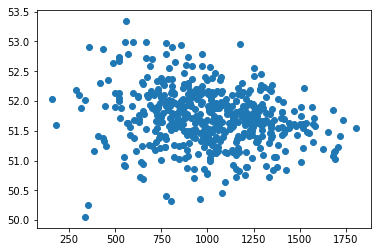

In [61]:
plt.scatter(mean_res.number_of_students, mean_res.test_score)

***Вывод:*** ...

Но как же тогда решить какие школы лучше? 

Сгруппируйте учеников в зависимости от типа школы (<= 1000 учеников == маленькая школа):

In [62]:
df_1 = df[df.number_of_students > 1000]
df_2 = df[df.number_of_students <= 1000]
df_1

school  test_score  number_of_students
1           54        64.0                1483
2          356        64.0                1055
3          108        68.0                1806
5          386        29.0                1027
6          317        51.0                1135
10         457        86.0                1106
11         222        59.0                1467
12         293        48.0                1166
14           3        41.0                1245
15         296        30.0                1027
16         268        71.0                1149
17          89        29.0                1315
18         491        49.0                1094
19         466        55.0                1303
23         408        39.0                1285
28         442        65.0                1137
29         189        36.0                1003
30         387        59.0                1206
31         252        39.0                1169
33         467        50.0                1257
34         209        44.0                1044
35          21        51.0                1422
36         496        53.0                1209
39         110        34.0                1020
40         434        91.0                1196
41          21        45.0                1422
42          94        66.0                1063
43           4        55.0                1015
52         128        82.0                1089
53         104        50.0                1073
...        ...         ...                 ...
501517     181        26.0                1343
501518     125        54.0                1316
501519      92        72.0                1276
501521      56        24.0                1277
501522     224        74.0                1338
501523     447        35.0                1654
501525     389        52.0                1199
501526     443        45.0                1035
501527      47        90.0                1261
501528     175        40.0                1152
501532      89        56.0                1315
501533     285        65.0                1721
501534     351        50.0                1224
501535     291        56.0                1057
501536     127        27.0                1294
501537     397        53.0                1083
501538     103        68.0                1004
501539     348        40.0                1681
501540       3        54.0                1245
501542     198        59.0                1233
501543     105        48.0                1164
501546      23        41.0                1243
501550     364        62.0                1105
501552     367        33.0                1046
501553     434        48.0                1196
501554     129        50.0                1291
501555     445        35.0                1479
501556     164        63.0                1046
501557      52        65.0                1361
501558     412        37.0                1032

[310479 rows x 3 columns]

Постройте гистограммы этих двух выборок на одном графике, установив параметры
* `bins=10` --- число бинов гистограммы;
* `alpha=0.5` --- прозрачность бинов.

(array([  335.,  2362.,  9703., 25966., 45209., 50045., 35573., 16142.,
         4656.,   888.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

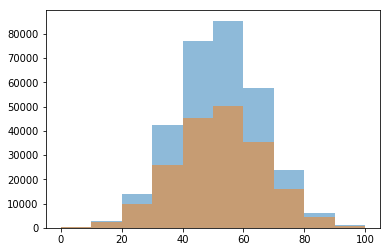

In [65]:
plt.hist(df_1.test_score, bins=10, alpha=0.5)
plt.hist(df_2.test_score, bins=10, alpha=0.5)

***Вывод:*** ...

#### Можно ли строго доказать, что маленькие школы лучше? 

Оказывается, что да, с помощью статистики можно показать, что результаты детей из небольших школ лучше. Перед нами две выборки из дискретных распределений, которые нам нужно сравнить.

В данном случае можно воспользоваться критерием Уилкоксона-Манна-Уитни. Все подробности вы узнаете в следующем семестре!

In [67]:
mannwhitneyu(df_1, df_2, alternative='greater')

MannwhitneyuResult(statistic=195168944849.5, pvalue=0.0)

Так как `p_value<0.5`, то результаты в маленьких школах лучше.